Iteration 1: Cost 4613.314246934809, Weight 0.8294161860134117, Bias 0.02330558130709
Iteration 2: Cost 923.3722391643523, Weight 1.1114103854438382, Bias 0.028736175709915344
Iteration 3: Cost 371.8461082358441, Weight 1.2204269848223626, Bias 0.03112222231750701
Iteration 4: Cost 289.4093385604227, Weight 1.2625687970802744, Bias 0.0323312148820514
Iteration 5: Cost 277.08591191389456, Weight 1.2788561799455216, Bias 0.03308514426935213
Iteration 6: Cost 275.24211088161877, Weight 1.2851479942874988, Bias 0.03366313902253103
Iteration 7: Cost 274.96466727139267, Weight 1.2875754267170791, Bias 0.034173112894086054
Iteration 8: Cost 274.92134232114483, Weight 1.288508852355586, Bias 0.034656786368253215
Iteration 9: Cost 274.91301040367597, Weight 1.2888646807942432, Bias 0.035130288981505005
Iteration 10: Cost 274.9099088243872, Weight 1.2889972047065317, Bias 0.03559985656624656
Iteration 11: Cost 274.90758904492384, Weight 1.2890433970133854, Bias 0.03606789995468853
Iteration 12: 

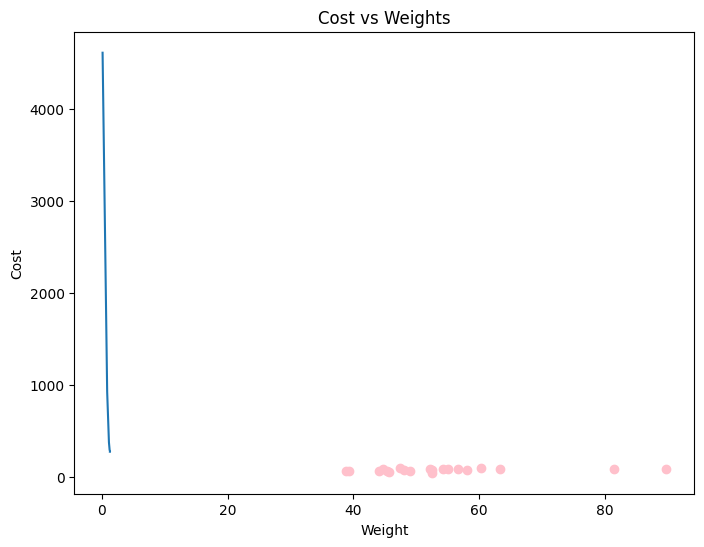

Estimated Weight: 1.272888252198252
Estimated Bias: 0.9558815898740776


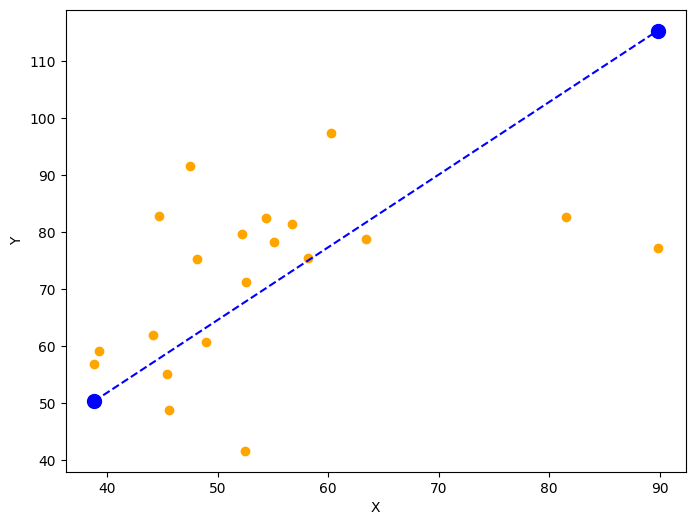

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):

    # Initializing weight, bias, learning rate, and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):

        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)

        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")

    # Visualizing the weights and cost for all iterations
    plt.figure(figsize=(8,6))
    plt.plot(weights, costs)
    plt.scatter(x, y, marker='o', color='pink')  # Use 'x' and 'y' instead of 'X' and 'Y'
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias

# Data
X = np.array([52.50234527, 63.42680403, 81.53035803, 47.47563963, 89.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([41.70700585, 78.77759598, 82.5623823 , 91.54663223, 77.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

def main():
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + estimated_bias

    # Plotting the regression line
    plt.figure(figsize=(8,6))
    plt.scatter(X, Y, marker='o', color='orange')  # Use 'orange' as color
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', marker='o', markersize=10, linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

if __name__=="__main__":
    main()
